In [93]:
import time
import pandas as pd
import re
import datetime

In [94]:
# load the csv file into a pandas dataframe
df = pd.read_csv("discord_channel_messages.csv")
df

,author,content,timestamp
0,KILLFEED,"Kaidan got killed by MrFahrenheit (KA-M, 51.53m)",2025-04-01T20:00:20.521Z
1,Unknown,"Patmus got killed by MrFahrenheit (KA-M, 7.75m)",2025-04-01T20:01:43.153Z
2,KILLFEED,"Friend got killed by LaC0 (Mlock-91, 1.12m)",2025-04-01T20:26:19.227Z
3,KILLFEED,"Apian got killed by [BuZz] John Pork (DMR, 3.07m)",2025-04-01T20:52:08.817Z
4,KILLFEED,Anthony Caponi got killed by JasonBjoern (KA-1...,2025-04-01T21:31:22.235Z
...,...,...,...
95,KILLFEED,"Survivor (3) got killed by Apian (DMR, 163.98m)",2025-04-01T19:19:16.391Z
96,KILLFEED,"KATAXNIA got killed by Brando2017 (VS-89, 151....",2025-04-01T19:31:54.334Z
97,KILLFEED,"Kaidan got killed by CLIFF (LAR, 12.16m)",2025-04-01T19:40:18.704Z
98,KILLFEED,"Kennycule got killed by MrFahrenheit (KA-M, 66...",2025-04-01T19:59:59.676Z


In [95]:
# load the csv file into a pandas dataframe
df = pd.read_csv("discord_channel_messages.csv")

# drop author column
df.drop(columns=['author'], inplace=True)

# Split column content
# Victim: before the first " got killed by "
# Killer: between " got killed by " and " "
# Meter: after ", " and before "m)"

df['Victim'] = df['content'].str.extract(r'^(.*?) got killed by ')
df['Killer'] = df['content'].str.extract(r' got killed by (.*?) \(')
df['Meter'] = df['content'].str.extract(r', (.*?)m\)')

# TMP: reverse the order of the characters in colmn content
df['tmp'] = df['content'].str[::-1]
# keep everything after the first " ," 
df['tmp'] = df['tmp'].str.split(' ,').str[1]
# remove everything behind the first "( " with regex
df['tmp'] = df['tmp'].str.replace(r'\(.*', '', regex=True)
# reverse the order of the characters in column tmp again
df['tmp'] = df['tmp'].str[::-1]



# drop the column content
df.drop(columns=['content'], inplace=True)

# create column date and column time from the column timestamp
df['date'] = pd.to_datetime(df['timestamp']).dt.date
df['time'] = pd.to_datetime(df['timestamp']).dt.time
# drop the column timestamp
df.drop(columns=['timestamp'], inplace=True)

df['date'] = pd.to_datetime(df['date'])

# remove everything behind . of colum time
df['time'] = df['time'].astype(str).str.split('.').str[0]

#df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.time
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.date

# drop duplicate rows
df.drop_duplicates(inplace=True)

#  cast m to number
df['Meter'] = df['Meter'].str.replace('m', '').astype(float)

df

,Victim,Killer,Meter,tmp,date,time
0,Kaidan,MrFahrenheit,51.53,KA-M,2025-04-01,20:00:20
1,Patmus,MrFahrenheit,7.75,KA-M,2025-04-01,20:01:43
2,Friend,LaC0,1.12,Mlock-91,2025-04-01,20:26:19
3,Apian,[BuZz] John Pork,3.07,DMR,2025-04-01,20:52:08
4,Anthony Caponi,JasonBjoern,31.45,KA-101,2025-04-01,21:31:22
...,...,...,...,...,...,...
95,Survivor (3),Apian,163.98,DMR,2025-04-01,19:19:16
96,KATAXNIA,Brando2017,151.91,VS-89,2025-04-01,19:31:54
97,Kaidan,CLIFF,12.16,LAR,2025-04-01,19:40:18
98,Kennycule,MrFahrenheit,66.85,KA-M,2025-04-01,19:59:59


In [96]:
# visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)


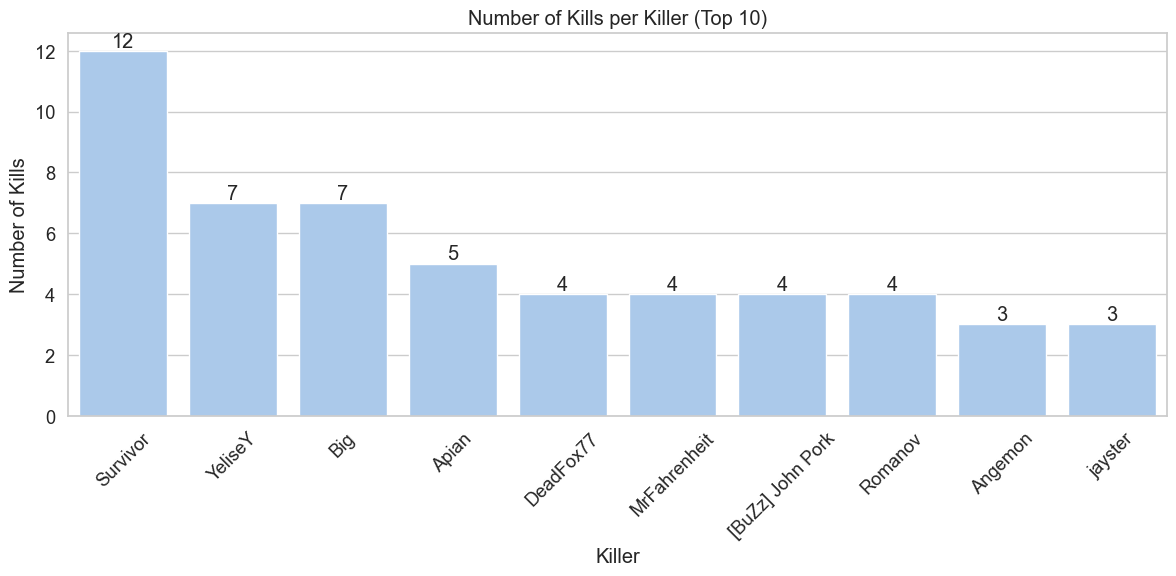

In [97]:
# Create a count plot of the number of kills per killer (top 10)
plt.figure(figsize=(12, 6))
top_10_killers = df['Killer'].value_counts().head(10).index
sns.countplot(data=df[df['Killer'].isin(top_10_killers)], x='Killer', order=top_10_killers)
plt.title('Number of Kills per Killer (Top 10)')
plt.xlabel('Killer')
plt.ylabel('Number of Kills')
plt.xticks(rotation=45)

# Add labels to the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()


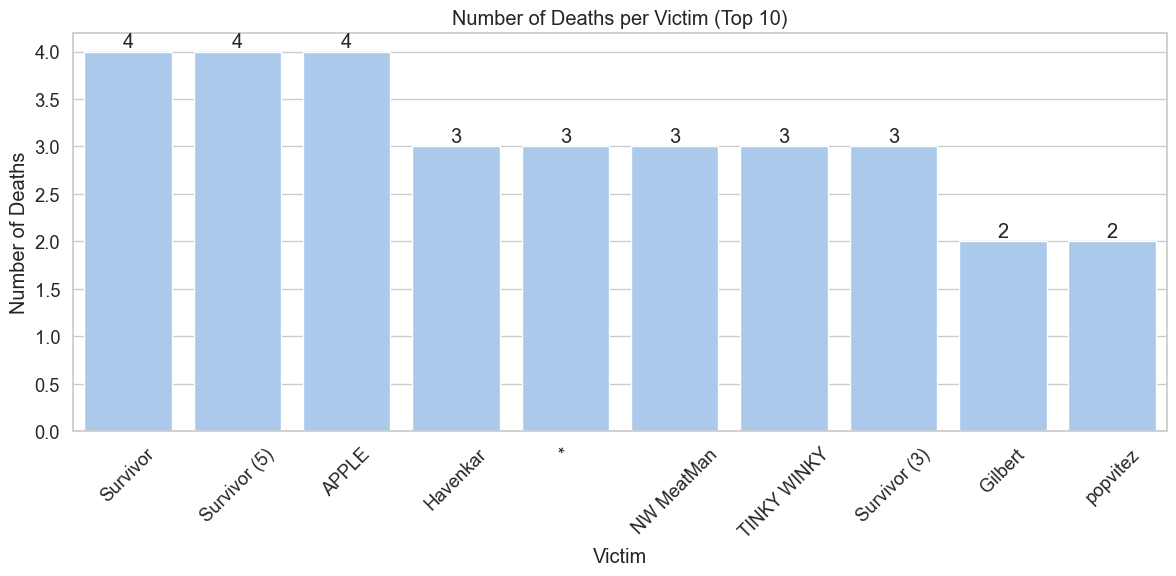

In [98]:
# Create a count plot of the number of kills per victim (top 10)
plt.figure(figsize=(12, 6))
top_10_victims = df['Victim'].value_counts().head(10).index
sns.countplot(data=df[df['Victim'].isin(top_10_victims)], x='Victim', order=top_10_victims)
plt.title('Number of Deaths per Victim (Top 10)')
plt.xlabel('Victim')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)

# Add labels to the bars
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

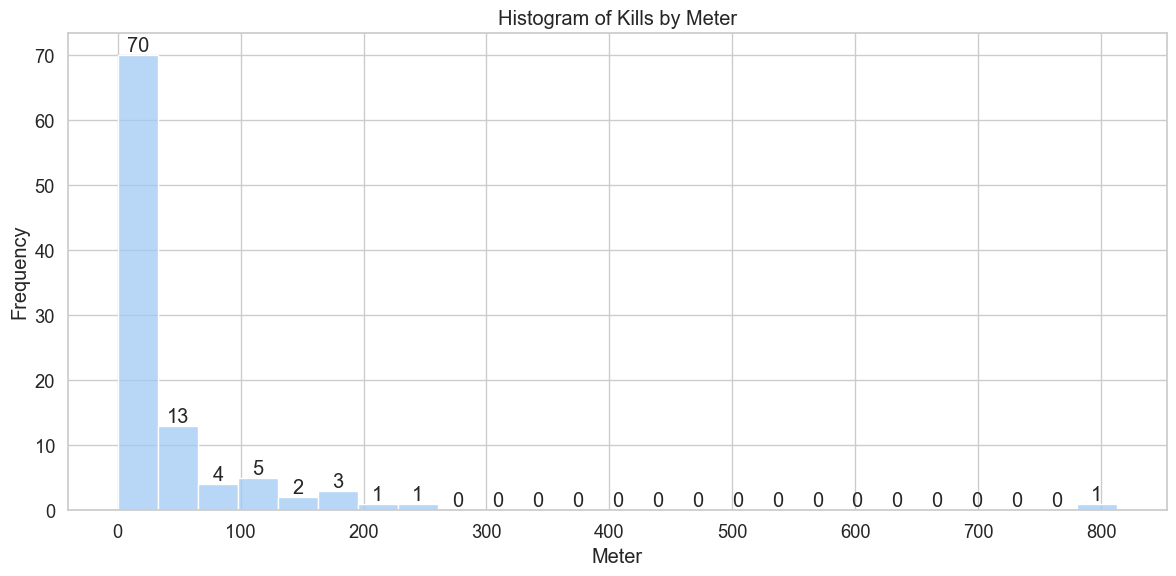

In [99]:
# Create a histogram for the Meter column with automatic bins
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df, x='Meter', bins=25, kde=False)
plt.title('Histogram of Kills by Meter')
plt.xlabel('Meter')
plt.ylabel('Frequency')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()


In [100]:
# table of the top 10 kills by meter
top_10_kills_by_meter = df.nlargest(10, 'Meter')
top_10_kills_by_meter.reset_index(drop=True, inplace=True)
top_10_kills_by_meter


,Victim,Killer,Meter,tmp,date,time
0,Mr.Freeman,[BuZz] John Pork,812.79,DMR,2025-04-04,18:57:39
1,Isabelle Vadnais,Grenka,240.30,VSD,2025-04-04,20:48:02
2,Survivor,[BuZz] taubenschreck,213.34,DMR,2025-03-31,20:38:57
3,APPLE,Survivor,176.86,Pioneer,2025-03-31,23:35:18
4,Kaido2k,jayster,166.26,M70 Tundra,2025-04-03,21:48:03
5,Survivor (3),Apian,163.98,DMR,2025-04-01,19:19:16
6,KATAXNIA,Brando2017,151.91,VS-89,2025-04-01,19:31:54
7,eggs,jayster,135.96,M70 Tundra,2025-04-03,21:23:54
8,Ghillie Dawg,YeliseY,114.98,Blaze,2025-04-04,01:48:08
9,BAMBI,Ragnarok,113.23,VS-89,2025-04-03,20:51:14


In [101]:
# Average kill distance per Weapon
average_kill_distance = df.groupby('tmp')['Meter'].mean().reset_index()
average_kill_distance.rename(columns={'tmp': 'Weapon', 'Meter': 'Average Distance (m)'}, inplace=True)
average_kill_distance.sort_values(by='Average Distance (m)', ascending=False, inplace=True)
average_kill_distance.reset_index(drop=True, inplace=True)
average_kill_distance.head(10)

,Weapon,Average Distance (m)
0,Pioneer,176.860000
1,DMR,132.252500
2,VS-89,111.973333
3,VSD,99.683333
4,M70 Tundra,96.163333
5,Blaze,87.820000
6,LE-MAS,42.615000
7,CR-527,34.726667
8,Mosin 91/30,31.280000
9,KA-M,27.511000


In [102]:
# Top weapons by kill count with average distance
top_weapons_by_kill_count = df['tmp'].value_counts().reset_index()
top_weapons_by_kill_count.columns = ['Weapon', 'Kill Count']
top_weapons_by_kill_count.reset_index(drop=True, inplace=True)

# Merge with average kill distance
top_weapons_with_avg_distance = top_weapons_by_kill_count.merge(
    average_kill_distance, on='Weapon', how='left'
)

# Sort by kill count and display the top 10
top_weapons_with_avg_distance.sort_values(by='Kill Count', ascending=False, inplace=True)
top_weapons_with_avg_distance.head(10)


,Weapon,Kill Count,Average Distance (m)
0,DMR,12,132.252500
1,KA-M,10,27.511000
2,M4-A1,7,18.404286
3,Bizon,7,6.611429
4,M70 Tundra,6,96.163333
5,KA-101,6,8.381667
6,AUR AX,4,8.250000
7,Vaiga,4,8.880000
8,Mlock-91,4,6.965000
9,CR-527,3,34.726667


In [103]:
# top 5 killer with the text "BuZz" in their name
top_5_killers_buzz = df[df['Killer'].str.contains('BuZz', case=False)]['Killer'].value_counts().head(5).reset_index()
top_5_killers_buzz.columns = ['Killer', 'Kill Count']
top_5_killers_buzz.reset_index(drop=True, inplace=True)
top_5_killers_buzz.head(5)

,Killer,Kill Count
0,[BuZz] John Pork,4
1,[BuZz] taubenschreck,1
